In [1]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\adras\Downloads\Data Analyst - Test Data - US.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the data
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [2]:
from dateutil import parser

def parse_date(date):
    try:
        return parser.parse(date)
    except:
        return pd.NaT

df['date'] = df['date'].apply(parse_date)

# Display the first few rows to check date parsing
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor


In [3]:
total_reviews = df.shape[0]
print(f"Total Reviews: {total_reviews}")

Total Reviews: 6448


In [4]:
date_range = (df['date'].min(), df['date'].max())
print(f"Date Range: {date_range}")

Date Range: (Timestamp('2018-08-01 00:00:00'), Timestamp('2019-08-20 00:00:00'))


In [5]:
missing_location_percentage = df['Location'].isnull().mean() * 100
print(f"Missing Location Data: {missing_location_percentage:.2f}%")

Missing Location Data: 73.46%


In [7]:
df.drop_duplicates()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019-07-12,United States of America
6444,·the internet barely worked or didn't work,2019-07-12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019-07-10,United States of America
6446,·we were early for check in and the staff was ...,2019-07-10,United States of America


In [8]:
df.nunique()

Review      6384
date         385
Location    1082
dtype: int64

In [13]:
df.describe()

,date
count,6448
mean,2019-02-08 13:48:58.957816320
min,2018-08-01 00:00:00
25%,2018-11-12 18:00:00
50%,2019-02-07 00:00:00
75%,2019-05-08 00:00:00
max,2019-08-20 00:00:00


In [14]:
df.isnull().sum()

Review         0
date           0
Location    4737
dtype: int64

In [10]:
common_locations = df['Location'].value_counts().head()
print(f"Common Locations: {common_locations}")

Common Locations: Location
United States of America    116
New York                     34
California                   19
San Jose                     19
Canada                       16
Name: count, dtype: int64


<Axes: >

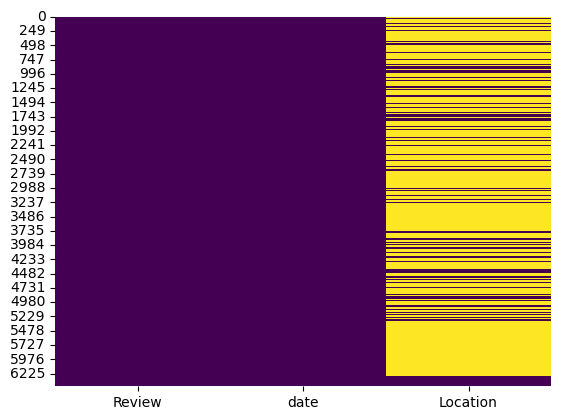

In [17]:
import seaborn as sns
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [24]:
# Calculate the percentage of missing values for each column
missing_values = df.isnull().mean() * 100

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

print(missing_values)

Location    73.46464
dtype: float64


In [11]:
from collections import Counter
import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

df['Review'] = df['Review'].fillna('')
reviews_text = ' '.join(df['Review'].apply(preprocess_text))
word_counts = Counter(reviews_text.split())

common_stopwords = set(['the', 'and', 'to', 'of', 'a', 'was', 'for', 'it', 'in', 'that', 'with', 'were', 'on', 'is', 'this', 'we', 'had', 'our', 'as', 'room', 'at'])
common_words = {word: count for word, count in word_counts.items() if word not in common_stopwords}
most_common_words = sorted(common_words.items(), key=lambda item: item[1], reverse=True)[:5]
print(f"Frequent Words in Reviews: {most_common_words}")

Frequent Words in Reviews: [('read', 10636), ('more', 5653), ('less', 5358), ('i', 3821), ('hotel', 2961)]


In [12]:
insights_data = {
    'Insight': [
        'Total Reviews',
        'Date Range of Reviews',
        'Missing Location Data',
        'Common Locations',
        'Frequent Words in Reviews'
    ],
    'Details': [
        f'The dataset contains {total_reviews} reviews.',
        f'The reviews span from {date_range[0]} to {date_range[1]}.',
        f'Approximately {missing_location_percentage:.2f}% of the reviews do not include location data.',
        f'Top locations with the most reviews: {", ".join(common_locations.index)}.',
        f'Common themes include words such as {", ".join([word for word, _ in most_common_words])}.'
    ]
}
insights_df = pd.DataFrame(insights_data)

file_path_with_insights = r"C:\Users\adras\Downloads\Data Analyst - Test Data with Insights.xlsx"
with pd.ExcelWriter(file_path_with_insights, engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='US', index=False)
    insights_df.to_excel(writer, sheet_name='Insights', index=False)